# Лабораторная работа №3

In [4]:
# 16 2012 MSE D F I H G E

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df0 = pd.read_excel('2012.xls')
df0.head()

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI,Weather Normalized Source EUI,Water per Square Foot,ENERGY STAR Score,GHG,Reported Building Square Footage,Reported Facility Type,Number of Buildings,Reported BINs
0,1000050010,115,BROAD STREET,MANHATTAN,10004,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000090001,34,WHITEHALL STREET,MANHATTAN,10004,Yes,1518.0,157.9,437.4,NaN,27.0,12077.53,852840.0,Office,1.0,1000018
2,1000090014,17,STATE STREET,MANHATTAN,10004,Yes,312.0,91.5,278.7,NaN,61.0,4817.62,574105.0,Office,1.0,1000020
3,1000090029,24,WHITEHALL STREET,MANHATTAN,10004,Yes,52.0,137.2,306.6,6.66,41.0,10190.38,859807.0,Office,1.0,1000021
4,1000100014,33,WHITEHALL STREET,MANHATTAN,10004,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df0.shape

(4081, 16)

In [8]:
df0.columns

Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI',
       'Weather Normalized Source EUI', 'Water per Square Foot',
       'ENERGY STAR Score', 'GHG', 'Reported Building Square Footage',
       'Reported Facility Type', 'Number of Buildings', 'Reported BINs'],
      dtype='object')

In [9]:
df = df0[['Borough', 'Benchmarking Submission', 'Weather Normalized Source EUI', 
          'Site EUI', 'Entry Number','ENERGY STAR Score']]
df.head()

,Borough,Benchmarking Submission,Weather Normalized Source EUI,Site EUI,Entry Number,ENERGY STAR Score
0,MANHATTAN,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN
1,MANHATTAN,Yes,437.4,157.9,1518.0,27.0
2,MANHATTAN,Yes,278.7,91.5,312.0,61.0
3,MANHATTAN,Yes,306.6,137.2,52.0,41.0
4,MANHATTAN,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Borough                        4081 non-null   object 
 1   Benchmarking Submission        4081 non-null   object 
 2   Weather Normalized Source EUI  2319 non-null   float64
 3   Site EUI                       2319 non-null   float64
 4   Entry Number                   2546 non-null   float64
 5   ENERGY STAR Score              1593 non-null   float64
dtypes: float64(4), object(2)
memory usage: 191.4+ KB


array([[<AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='Site EUI', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='Entry Number', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Weather Normalized Source EUI'>],
       [<AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='Site EUI', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='Entry Number', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Site EUI'>],
       [<AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Entry Number'>,
        <AxesSubplot:xlabel='Site EUI', ylabel='Entry Number'>,
        <AxesSubplot:xlabel='Entry Number', ylabel='Entry Number'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Entry Number'>],
       [<AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='ENERGY

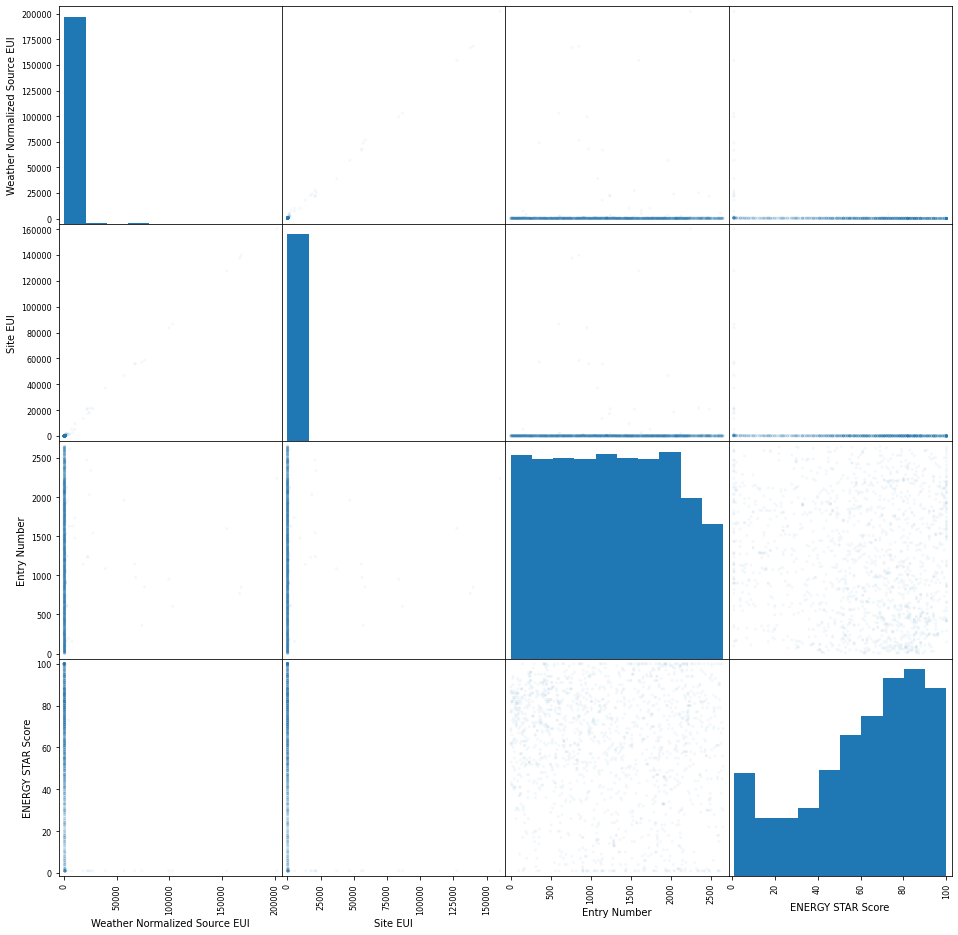

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.05, figsize=(16, 16))

In [12]:
df = df.dropna(subset=['ENERGY STAR Score'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 1 to 4076
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Borough                        1593 non-null   object 
 1   Benchmarking Submission        1593 non-null   object 
 2   Weather Normalized Source EUI  1518 non-null   float64
 3   Site EUI                       1518 non-null   float64
 4   Entry Number                   1593 non-null   float64
 5   ENERGY STAR Score              1593 non-null   float64
dtypes: float64(4), object(2)
memory usage: 87.1+ KB


In [14]:
df['Weather Normalized Source EUI'].fillna(df['Weather Normalized Source EUI'].mean(), inplace=True)
df['Site EUI'].fillna(df['Site EUI'].mean(), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 1 to 4076
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Borough                        1593 non-null   object 
 1   Benchmarking Submission        1593 non-null   object 
 2   Weather Normalized Source EUI  1593 non-null   float64
 3   Site EUI                       1593 non-null   float64
 4   Entry Number                   1593 non-null   float64
 5   ENERGY STAR Score              1593 non-null   float64
dtypes: float64(4), object(2)
memory usage: 87.1+ KB


In [16]:
ohc_borough = pd.get_dummies(df['Borough'])

In [17]:
df = df.drop(['Borough'], axis=1)

In [18]:
df = pd.concat([df, ohc_borough], axis=1)

In [19]:
df.shape

(1593, 10)

In [20]:
df['Benchmarking Submission'].value_counts()

Yes    1593
Name: Benchmarking Submission, dtype: int64

In [21]:
df = df.drop(['Benchmarking Submission'], axis = 1)

# Обучение

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
labels = df['ENERGY STAR Score']
data = df.drop(['ENERGY STAR Score'], axis=1)

In [24]:
feature_names = data.columns

In [25]:
labels.loc[labels < 70] = 0
labels.loc[labels >= 70] = 1

/Users/igor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/igor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                   test_size = 0.3,
                                                   random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1115, 8)
(478, 8)
(1115,)
(478,)


In [27]:
tree = DecisionTreeClassifier(criterion='entropy',random_state = 17)

In [28]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7405857740585774

In [29]:
predictions = tree.predict(X_test)
metrics.accuracy_score(y_test, predictions) # выводим точность

0.7405857740585774

# Случайный лес

In [30]:
from sklearn import ensemble


In [31]:
accuracity = []
number_of_trees = []
for i in range(1, 10):
    rf = ensemble.RandomForestClassifier(max_depth=i, random_state=11)
    rf.fit(X_train, y_train)
    prediction_rf = rf.predict(X_test)
    
    accuracity.append(metrics.accuracy_score(y_test, prediction_rf))
    number_of_trees.append(i)

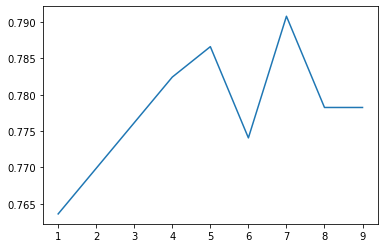

In [32]:
plt.plot(number_of_trees, accuracity)

# Отбор признаков с помощью алгоритма случайного леса

In [33]:
import numpy as np

In [34]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print('Feature imprortances:')
for f, idx in enumerate(indices):
    print("{:2d}.feature '{:5s}' ({:.4f})".format(f+1, feature_names[idx], importances[idx]))

Feature imprortances:
 1.feature 'Weather Normalized Source EUI' (0.3810)
 2.feature 'Site EUI' (0.3644)
 3.feature 'Entry Number' (0.1890)
 4.feature 'MANHATTAN' (0.0248)
 5.feature 'QUEENS' (0.0212)
 6.feature 'BROOKLYN' (0.0084)
 7.feature 'BRONX' (0.0058)
 8.feature 'STATEN ISLAND' (0.0053)


(-1.0, 8.0)

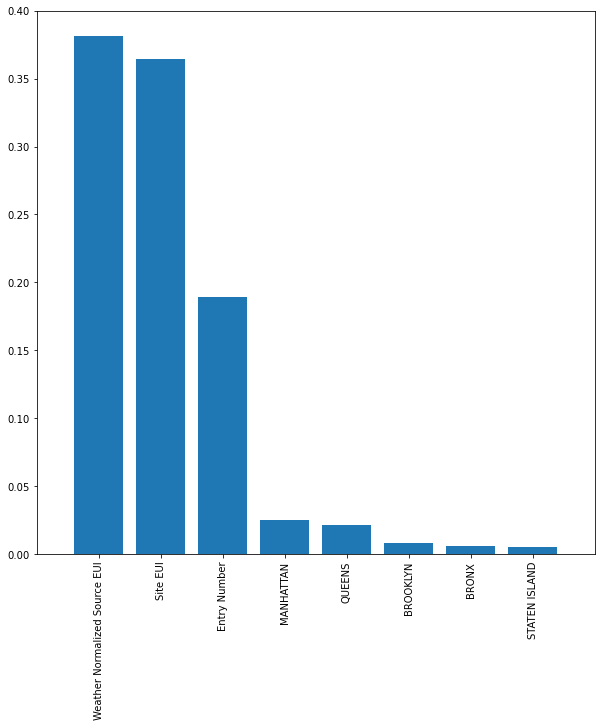

In [35]:
d_first = 8
plt.figure(figsize=(10,10))
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])